# Regressing 2D Data with a Two-Layer Neural Network


<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<a href="https://colab.research.google.com/github/DeepTrackAI/DeepLearningCrashCourse/blob/main/Ch02_DNN_regression/ec02_3_dnn2_reg/dnn2_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<strong>If using Colab/Kaggle:</strong> You need to copy the auxiliary *.csv and *.py files from the
<a href="https://github.com/DeepTrackAI/DeepLearningCrashCourse/tree/main/Ch02_DNN_regression/ec02_3_dnn2_reg">notebook folder</a>
in GitHub to the Colab/Kaggle work directory.
</div>

This notebook provides you with a complete code example that
loads the data in `data_reg_2d_linear.csv`, trains a two-layer dense neural network to fit them, and finally uses the trained network to predict the values of the data in `data_reg_2d_linear_test.csv`.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 2-3 from the book  

**Deep Learning Crash Course**  
Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo, Giovanni Volpe  
No Starch Press, San Francisco (CA), 2025  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Loading and Plotting the Data

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_linear.csv")

print("x:", x)
print("y_gt:", y_gt)

print(len(x))
print(len(y_gt))

x: [[-0.01264992 -0.85443355]
 [ 0.76032383 -0.97434942]
 [ 0.01950686  0.27497154]
 [-1.58945469 -1.54899742]
 [-0.4683091   0.04368673]
 [-0.07725676  0.35296562]
 [-0.88869315  0.9471676 ]
 [-0.28959776 -0.32629691]
 [-0.3686084   0.77991726]
 [-0.01630287  0.69537186]
 [ 1.04251786  0.30325747]
 [-1.02762036  0.28614963]
 [ 1.35221365  0.00522689]
 [ 1.11043191  0.06395982]
 [ 0.20114065 -0.72740412]
 [-0.5236721   1.02450951]
 [-0.74496852  0.76759749]
 [-0.34330278  1.47764927]
 [-1.48967134  0.66148164]
 [ 0.91347373  0.20379262]
 [-1.04925868 -0.70112109]
 [ 1.47620376  0.38821102]
 [ 0.16479918 -0.08658965]
 [-0.88185459 -0.33227438]
 [-0.08707602 -0.18477628]
 [ 1.34159875  1.94937676]
 [-0.32110135  1.54589904]
 [ 2.40018166 -0.03238685]
 [-1.00355408  0.07884853]
 [ 0.48644429  0.64149119]
 [ 0.49777571 -0.98064575]
 [ 0.96754236  1.76567471]
 [-1.05642191 -1.36633827]
 [ 1.00046248  0.80779301]
 [ 0.48090259  1.32363817]
 [-0.93721223 -1.31488225]
 [-0.7783187  -1.1272839 

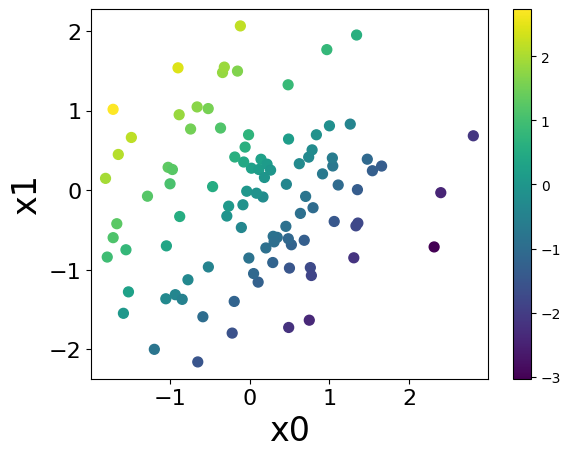

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Implementing a Dense Neural Network

Implement the sigmoidal activation function ...

In [3]:
from numpy import exp

def sigmoid(x):
    """Sigmoid function."""
    return 1 / (1 + exp(-x))

... implement a function to define the neural network ...

In [4]:
def dnn2_reg(wa, wb, x):
    """Two-layer dense neural network for classification."""
    return sigmoid(x @ wa) @ wb

... define the number of neurons in the first layer ...

In [5]:
num_neurons = 3

... randomly initialize its weights ...

In [6]:
from numpy.random import default_rng

rng = default_rng()
wa = rng.standard_normal(size=(2, num_neurons))  # Input weights layer 1.
wb = rng.standard_normal(size=(num_neurons, 1))  # Input weights layer 2.

... obtain its predictions for the input data ...

In [7]:
y_p = dnn2_reg(wa, wb, x)

... and plot its predictions.

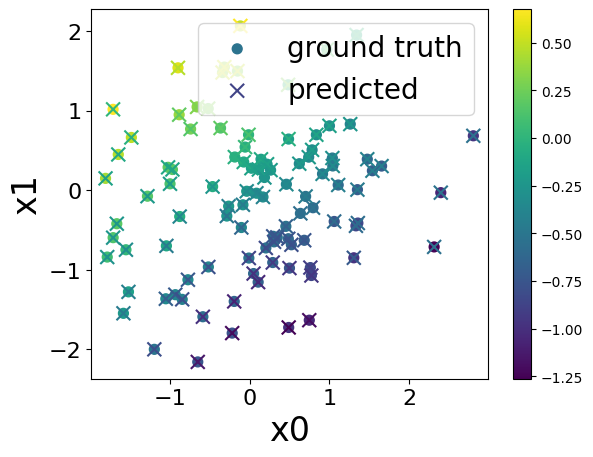

In [8]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=dnn2_reg(wa, wb, x))

## Training with the Backpropagation Algorithm

Implement the first derivative of the sigmoid function ...

In [9]:
def d_sigmoid(x):
    """Derivative of sigmoid function."""
    return sigmoid(x) * (1 - sigmoid(x))

... implement the backpropagation algorithm ...

In [10]:
from numpy import reshape, sum, transpose

num_samples = len(x)
num_train_iterations = 10 ** 5
eta = .1  # Learning rate.

for i in range(num_train_iterations):
    # Select random sample.
    selected = rng.integers(0, num_samples)
    x_selected = reshape(x[selected], (1, -1))
    y_gt_selected = reshape(y_gt[selected], (1, -1))

    # Detailed neural network calculation.
    x_selected_a = x_selected  # Input layer 1.
    p_a = x_selected_a @ wa  # Activaiton potential layer 1.
    y_selected_a = sigmoid(p_a)  # Output layer 1.

    x_selected_b = y_selected_a  # Input layer 2.
    p_b = x_selected_b @ wb  # Activation potential layer 2.
    y_selected_b = p_b  # Output layer 2 (output neuron).
    
    y_p_selected = y_selected_b
    
    # Update weights.
    error = y_p_selected - y_gt_selected

    delta_b = error * 1
    wb = wb - eta * delta_b * transpose(x_selected_b)

    delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a)
    wa = wa - eta * delta_a * transpose(x_selected_a)

    if i % 100 == 0:
        print(f"{i} y_p={y_p_selected[0, 0]:.2f} error={error[0, 0]:.2f}")

0 y_p=-0.45 error=-0.35
100 y_p=0.89 error=0.05
200 y_p=-0.13 error=-0.01
300 y_p=-1.09 error=-0.31
400 y_p=-0.54 error=-0.09
500 y_p=2.07 error=-0.37
600 y_p=-1.77 error=-0.03
700 y_p=-0.17 error=-0.07
800 y_p=-1.98 error=0.18
900 y_p=-1.84 error=0.01
1000 y_p=1.19 error=0.07
1100 y_p=-0.44 error=-0.06
1200 y_p=0.68 error=0.13
1300 y_p=2.05 error=-0.10
1400 y_p=0.74 error=0.14
1500 y_p=1.59 error=0.07
1600 y_p=0.09 error=-0.02
1700 y_p=0.49 error=0.06
1800 y_p=-1.02 error=-0.02
1900 y_p=0.49 error=0.06
2000 y_p=0.11 error=0.04
2100 y_p=-0.88 error=-0.14
2200 y_p=0.29 error=0.04
2300 y_p=1.81 error=-0.03
2400 y_p=1.22 error=0.10
2500 y_p=-1.75 error=0.03
2600 y_p=-0.28 error=-0.03
2700 y_p=0.76 error=-0.03
2800 y_p=-0.26 error=-0.01
2900 y_p=0.40 error=0.06
3000 y_p=0.20 error=0.04
3100 y_p=0.78 error=0.07
3200 y_p=1.40 error=0.08
3300 y_p=1.86 error=-0.01
3400 y_p=-1.37 error=-0.06
3500 y_p=0.09 error=0.03
3600 y_p=-0.03 error=-0.00
3700 y_p=1.71 error=0.05
3800 y_p=0.27 error=0.03
39

... and plot its predictions.

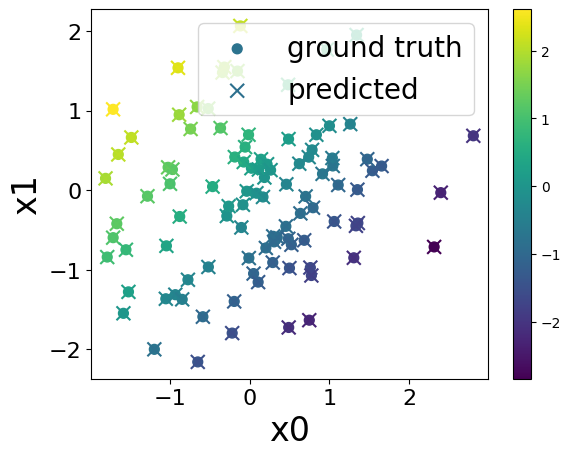

In [11]:
plot_pred_2d(x, y_gt, y_p=dnn2_reg(wa, wb, x))

## Testing the Performance of the Trained Neural Network

Check how the trained neuron works on the test data.

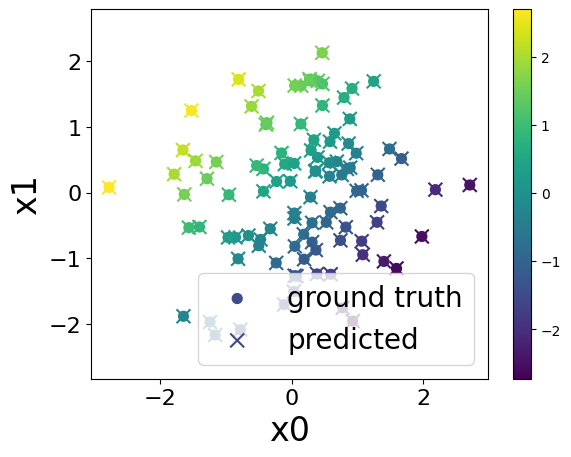

In [12]:
(x_test, y_gt_test) = load_data(filename="data_reg_2d_linear_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=dnn2_reg(wa, wb, x_test))